In [1]:
import tests
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
BASEPATH = r"resource/"
RAWPATH = f"{BASEPATH}raw/"
RESULTPATH = f"{BASEPATH}result/"
DISPLAYPATH = f"{BASEPATH}outputForDisplay/"
TIMETAKENPATH = f"{BASEPATH}timetaken/"
PLATFORM = ["serial", "omp", "cuda"]

calculationResult = {
    "totalWorkingTime" : {},
    "performanceGain" : {},
    "efficiency" : {}, 
}

In [3]:
# calculate the performance gain from file
# unnamed.jpg
def getImagePath(channel, imName, platform) :
    if channel == 4 : 
        # get the merge 
        # imName + merged_result.jpg
        return f"{RESULTPATH}{platform}/{imName}merged_result.jpg", "Final Result"
    elif channel == 1 : 
        # red 
        return f"{RESULTPATH}{platform}/{imName}channel_red.jpg", "Red Processed"
    elif channel == 2 : 
        # green 
        return f"{RESULTPATH}{platform}/{imName}channel_green.jpg", "Green Processed"
    else : 
        # blue 
        return f"{RESULTPATH}{platform}/{imName}channel_blue.jpg", "Blue Processed"

# get the performance gain and efficiency for 3 platform 
def calculateResult(imName) :
    # read text file 
    for p in PLATFORM : 
        timeResult = tests.readByLineInt(f"{TIMETAKENPATH}{p}_{imName}.txt")
        
        calculationResult["totalWorkingTime"][f"{p}_{imName}"] = timeResult[0] + timeResult[1] + timeResult[2]

    # start calculate peformance gain 
    for p in PLATFORM : 
        if p != "serial" : 
            calculationResult["performanceGain"][f"{p}_{imName}"] = calculationResult["totalWorkingTime"][f"serial_{imName}"] / calculationResult["totalWorkingTime"][f"{p}_{imName}"]

            calculationResult["efficiency"][f"{p}_{imName}"] = calculationResult["performanceGain"][f"{p}_{imName}"]/(tests.NUM_THREADS_OMP if p == "omp" else tests.NUM_THREADS_CUDA)
    
    # call tests.py function to generate performance and efficiency 
    tests.drawPerformanceGainBarPlot(calculationResult, DISPLAYPATH, imName=[imName])
    tests.drawEfficiencyBarPlot(calculationResult, DISPLAYPATH, imName=[imName])

# for display image use
def showMultiple(col, platform, image, figsize=None) :
    if figsize is None :
        plt.figure(figsize=(20,10))
    else : 
        plt.figure(figsize=figsize)

    imName = os.path.splitext(image)[0]
    
    plt.suptitle(f"{platform} Result ({imName})", fontsize=20)

    originalImage = cv2.imread(f"{RAWPATH}{image}")
    
    # show the first
    plt.subplot(1, col, 1)
    plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')
    
    for i in range(1, 5) : 
        imPath, stitle = getImagePath(channel=i, imName=imName, platform=platform)
        imageRead = cv2.imread(imPath)
        
        plt.subplot(1, col, i + 1)

        plt.imshow(cv2.cvtColor(imageRead, cv2.COLOR_BGR2RGB))
        plt.title(stitle)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

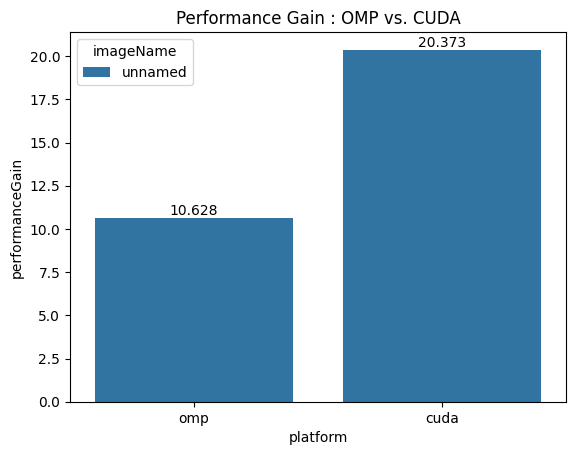

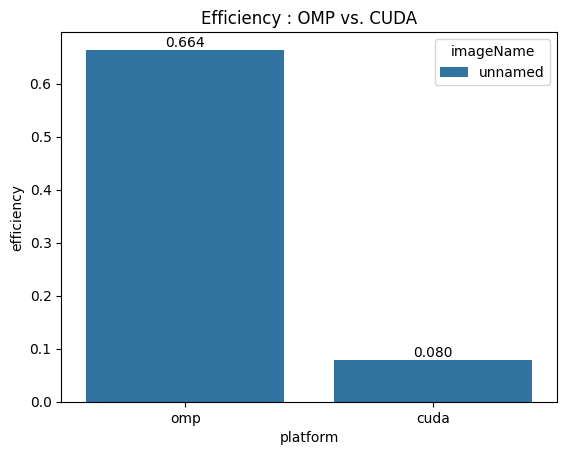

In [4]:
# peformance gain and efficiency 
calculateResult("unnamed")

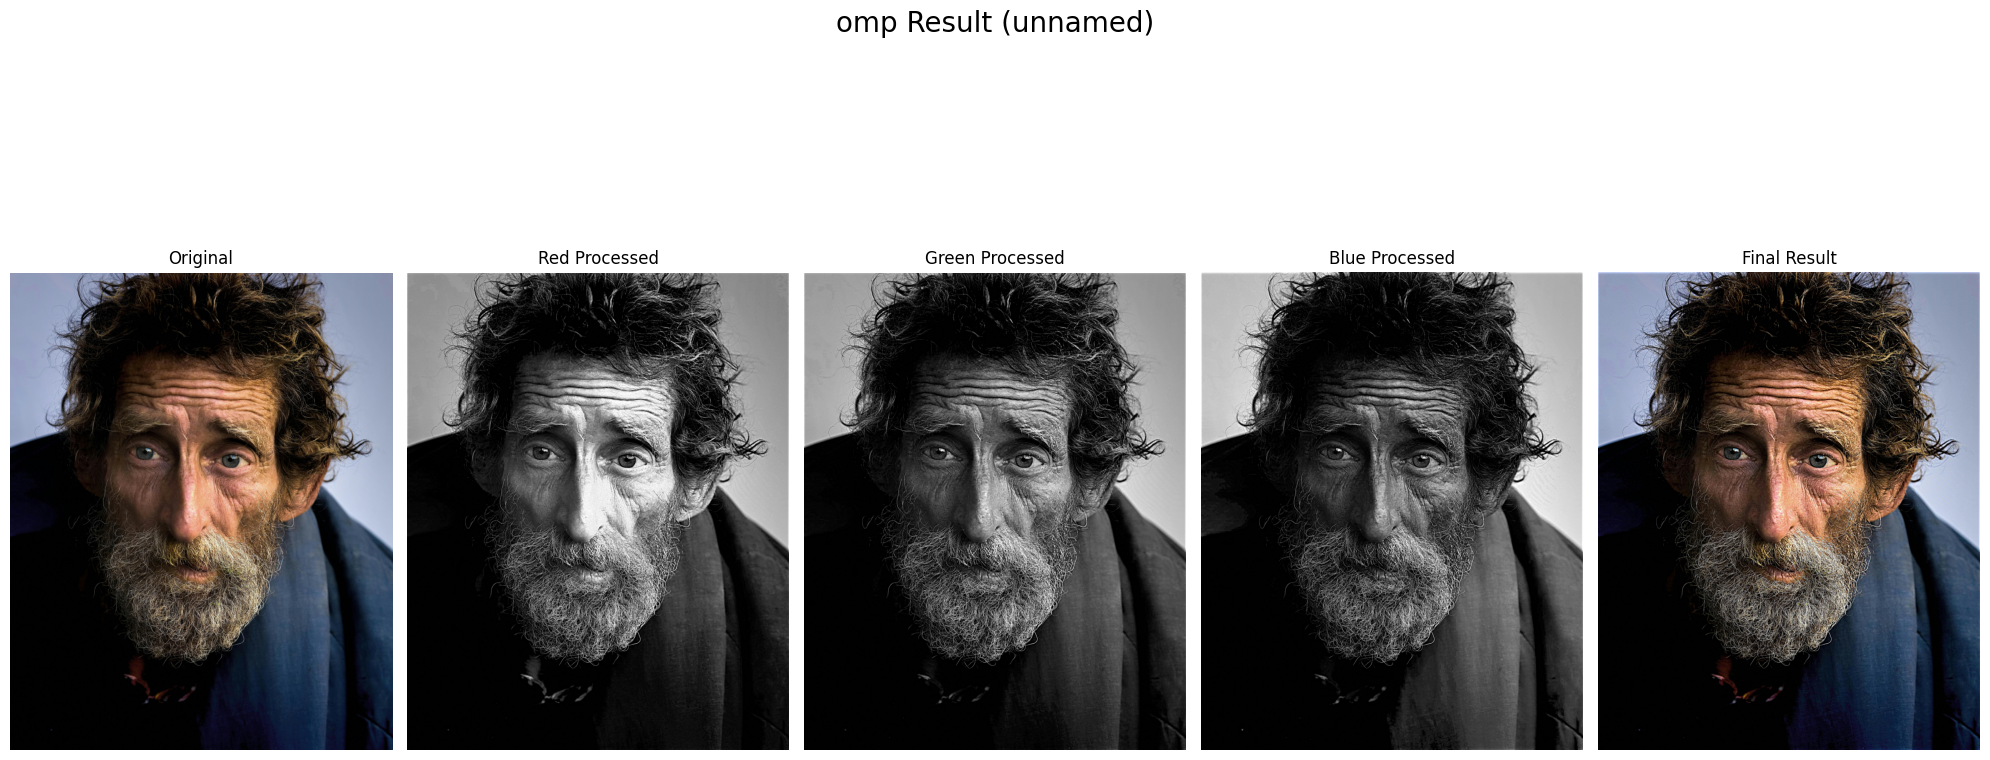

In [5]:
# display result [ ori, r, g, b, final ] 
showMultiple(col=5, platform="omp", image="unnamed.jpg")